# Hands-on project: Build a Coding Agent  

In this notebook, you can practice what you've learned in the course videos by **building your own coding agent**. 

You'll build this agent step-by-step, defining the tools it needs and implementing the agent loop that lets it reason through tasks.

You can write code by hand if you wish, but this project item includes access to a chatbot built right into the Jupyter notebook, which you can ask for help or instruct to write code for you. 

> ⚠️ **Important:** Your workspace session lasts 2 hours. Remember to download `project.ipynb` periodically to save your progress!

## 📚 About the Project

You'll build an agent that autonomously generates and executes code in a secure cloud sandbox to respond to user queries.

Here's the fun part - **you get to design the agent yourself!** Maybe your agent specializes in data analysis and visualizations. Or maybe it builds small web apps, like a calculator widget. The choice is yours!

<details>
<summary><strong>Your project should include</strong></summary>

- A function that accepts a user query as input
- Tool functions with schemas that the LLM can call (like execute_code)
- Code that handles conversation memory and the **agent loop** described in the "Inside a coding agent" video
- Access to an E2B sandbox to enable safe code execution

</details>

For the two example agents mentioned above, here's what the final product might look like:

<table>
<tr>
<td width="50%" valign="top">
<strong>📊 Data Analyzer Agent</strong><br/>
Generates synthetic datasets, performs statistical analysis, and creates visualizations
<br/><br/>
<img src="images/histogram.png" width="90%" style="max-height: 300px; object-fit: contain;" alt="Data Analyzer Output" />
</td>
<td width="50%" valign="top">
<strong>🌐 Web Builder Agent</strong><br/>
Creates interactive web applications with HTML, CSS, and JavaScript
<br/><br/>
<img src="images/calculator_app.png" width="90%" style="max-height: 300px; object-fit: contain;" alt="Calculator App Output" />
</td>
</tr>
</table>

## Your project workflow

To build your coding agent, you'll carry out the following workflow:
1. **Tool calling** 🛠️ — define tool schemas and functions to help your agent interact with files
2. **Agent loop** 🔄 — build the iterative loop that let's your agent work through your task
3. **Sandbox execution** ☁️ — give your agent access to an E2B sandbox

```

           [ Specify tools 🛠️ ]
                   |
                   v
          [ Implement agent loop 🔄 ]
                   |
                   v
        [ Set up sandbox execution ☁️ ]
```
## 💡 Tips for completing the project

This project space includes access to a chatbot that can assist you as your work on your coding agent. 

To open Jupyter chat, click on the chat bubble icon on the left sidebar of Jupyter Lab:

  <img src="images/jupyter_chat_bordered.png" width="150" style="vertical-align: middle;">

<div style="background-color:#fff6ff; padding:13px; border-width:3px; border-color:#efe6ef; border-style:solid; border-radius:6px">
<p><summary><strong>🗂️ Reminder: Attach context to every chatbot prompt</strong></summary>

<p>When you ask the chatbot for help, always upload these files so it has full project context:

- `project.ipynb`: shares your latest code and notebook state
- `docs.md`: E2B + OpenAI documentation (linked in the next section)</p>

<p>Bringing all context keeps responses grounded in what you've built and E2B capabilities.</p>

<p>**Debugging tip:** When troubleshooting issues, share error messages and relevant code snippets with the chatbot. Follow iterative debugging practices—test small changes, verify outputs, and use the AI assistant to help diagnose problems step by step.</p>

</div>

# Step 1: 🛠️ Tool Calling

It's time to define the tools your agent can use! Every tool extends what your agent can do—from executing code to manipulating files.

- 🎯 **Goal:** Create function schemas that tell the LLM what tools are available and how to call them
- 🔁 **Workflow:** Think about what tools your agent needs (like execute_code for running Python, or write_file for creating files), then implement their schemas and execution logic
- 💡 **Remember:** Tools are called by the LLM via function calling, so schemas must be precise
- 💡 **Tip:** Use the JupyterAI chatbot with the **prompt examples below**
- 📎 **Attach these files:** `project.ipynb` and `docs.md` when asking the chatbot for help

---

## ✅ Your tool system should include:

- ✓ Function schemas that describe each tool's name, description, and parameters
- ✓ Implementation functions that execute the actual tool logic
- ✓ An executor handler that routes LLM tool calls to implementations
- ✓ Error handling for invalid tool calls or execution failures

---

<details>
<summary><strong>📚 Refresher: Function Schema Pattern (click to expand)</strong></summary>

Every tool needs three components:

1. **Schema** - JSON object describing the function signature for the LLM
2. **Implementation** - Python function that executes the tool
3. **Executor** - Handler that routes LLM tool calls to implementations

**Schema Structure:**
```python
{
    "type": "function",
    "name": "execute_code",
    "description": "Execute Python code and return result",
    "parameters": {
        "type": "object",
        "properties": {
            "code": {"type": "string", "description": "Python code"}
        },
        "required": ["code"],
        "additionalProperties": False
    }
}
```

**Why function calling?**
- Gives the LLM structured ways to interact with your system
- Ensures type safety and validation
- Enables the LLM to use tools autonomously during reasoning

</details>

<details>
<summary><strong>📚 Refresher: Tool Components (click to expand)</strong></summary>

**Implementation function:**
```python
def execute_code(code: str) -> dict:
    # Execute the code and capture output
    # Return dict with "results" and "errors" keys
    pass
```

**Executor function:**
```python
def execute_tool(name: str, args: str, tools: dict) -> dict:
    # Parse JSON args
    # Look up tool by name
    # Call tool function with args
    # Handle errors gracefully
    pass
```

**Tools dictionary:**
```python
tools = {
    "execute_code": execute_code,
    "write_file": write_file,
    # ... more tools
}
```

</details>

---


<details>
<summary><strong>🌐 Prompt Example —API Integration Tools (click to expand)</strong></summary>

```
You are my coding assistant. Generate Python code to define the tool calling system for my API Integration Agent.
Return code only-no explanations, comments, or markdown.

Requirements:
1. Import warnings and suppress warnings with warnings.filterwarnings('ignore')
2. Import sys, StringIO, json, os, and Callable from typing
3. Import OpenAI from openai
4. Initialize client = OpenAI()
5. Define execute_code(code: str) -> dict function that runs code locally using exec() and captures stdout
6. Define write_file(content: str, file_path: str) -> dict that writes content to file and creates directories if needed
8. Define execute_code_schema and write_file_schema as function schema dicts
9. Create tools dict mapping "execute_code" and "write_file" to their functions
10. Define execute_tool(name: str, args: str, tools: dict) handler with error handling
11. Handle JSONDecodeError, KeyError, PermissionError, and general exceptions

**Attachments:**
- `docs.md` for E2B + OpenAI documentation
- `project.ipynb` to see the progress of my project
```

</details>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import sys
from io import StringIO
import json
import os
from typing import Callable
from openai import OpenAI

client = OpenAI()

def execute_code(code: str) -> dict:
    execution = {"results": [], "errors": []}
    old_stdout = sys.stdout
    sys.stdout = StringIO()
    try:
        exec(code)
        output = sys.stdout.getvalue()
        execution["results"].append(output)
    except Exception as e:
        execution["errors"].append(str(e))
    finally:
        sys.stdout = old_stdout
    return execution

def write_file(content: str, file_path: str) -> dict:
    try:
        os.makedirs(os.path.dirname(file_path), exist_ok=True)
        with open(file_path, "w", encoding="utf-8") as f:
            f.write(content)
        return {"results": [f"File written to {file_path}"], "errors": []}
    except PermissionError as e:
        return {"results": [], "errors": [f"Permission denied: {str(e)}"]}
    except Exception as e:
        return {"results": [], "errors": [str(e)]}

# Allows the agent to read files, which is essential for reviewing its own work, debugging, or
# processing data from files.
def read_file(file_path: str):
    try:
        with open(file_path, "r") as f:
            content = f.read(file_path)
        return {"results": [content]}, {}
    except Exception as e:
        return {"results": [], "errors": [str(e)]}

# Enables the agent to list files and directories to understand its environment, find files it
# has created, or navigate the file system.
def list_files(path: str):
    try:
        files = [f for f in os.listdir(path)]
        return {"results": [files]}, {}
    except Exception as e:
        return {"results": [], "errors": [str(e)]}

execute_code_schema = {
    "type": "function",
    "name": "execute_code",
    "description": "Execute Python code and return the output or errors",
    "parameters": {
        "type": "object",
        "properties": {
            "code": {"type": "string", "description": "Python code to execute"}
        },
        "required": ["code"],
        "additionalProperties": False
    }
}

write_file_schema = {
    "type": "function",
    "name": "write_file",
    "description": "Write content to a file path, creating directories if needed",
    "parameters": {
        "type": "object",
        "properties": {
            "content": {"type": "string", "description": "File content"},
            "file_path": {"type": "string", "description": "Path to save the file"}
        },
        "required": ["content", "file_path"],
        "additionalProperties": False
    }
}

read_file_schema = {
    "type": "function",
    "name": "read_file",
    "description": "Read content from a file path",
    "parameters": {
        "type": "object", 
        "properties": {
            "file_path": {"type": "string", "description": "Path of the file to read"}
            },
        "required": ["file_path"],
        "additionalProperties": False
    }
}

list_files_schema = {
    "type": "function", 
    "name": "list_files", 
    "description": "List files in a directory",
    "parameters": {
        "type": "object", 
        "properties": {
            "path": {"type": "string", "description": "Path of the directory to list"}
        },
        "required": ["path"],
        "additionalProperties": False
    }
}

tools = {
    "execute_code": execute_code,
    "write_file": write_file,
    "read_file": read_file,
    "list_files": list_files
}

def execute_tool(name: str, args: str, tools: dict[str, Callable]) -> dict:
    try:
        parsed_args = json.loads(args)
        if name not in tools:
            return {"error": f"Tool {name} not found."}
        return tools[name](**parsed_args)
    except json.JSONDecodeError as e:
        return {"error": f"Failed to parse arguments: {str(e)}"}
    except KeyError as e:
        return {"error": f"Missing argument: {str(e)}"}
    except PermissionError as e:
        return {"error": f"Permission error: {str(e)}"}
    except Exception as e:
        return {"error": str(e)}

# Step 2: 🔄 Agent Loop

Now build the iterative loop that powers your coding agent! This is where the LLM reasons, calls tools, receives results, and decides what to do next.

- 🎯 **Goal:** Implement a multi-step agent that iterates until task completion or max steps
- 🔁 **Workflow:** Create a loop that alternates between LLM calls and tool execution
- 💡 **Remember:** Use max_steps to prevent infinite loops, and stop when the LLM doesn't call any functions
- 💡 **Tip:** Use the JupyterAI chatbot with the **prompt examples below**
- 📎 **Attach these files:** `project.ipynb` and `docs.md` when asking the chatbot for help

---

## ✅ Your agent loop should include:

- ✓ Message history that accumulates conversation context
- ✓ LLM API calls with developer system prompt, messages, and tool schemas
- ✓ Processing of response parts (text messages and function calls)
- ✓ Tool execution and result injection back into conversation
- ✓ Stopping conditions (max steps or no function calls)

---

<details>
<summary><strong>📚 Refresher: Agent Loop Pattern (click to expand)</strong></summary>

The agent follows this cycle:

1. **Send query** to LLM with system prompt and conversation history
2. **Process response** - check if LLM wants to call tools
3. **Execute tools** - run functions and add results to conversation
4. **Repeat** until LLM responds without tool calls or max_steps reached

**Why an agent loop?**
- Enables multi-step reasoning and tool use
- Allows the LLM to see tool results and adapt its strategy
- Prevents infinite loops with max_steps safeguard

</details>

<details>
<summary><strong>📚 Refresher: Key Components (click to expand)</strong></summary>

**Message History:**
```python
messages = [
    {"role": "user", "content": "Create a function that adds two numbers"},
    # LLM responses and tool results get appended here
]
```

**Stopping Conditions:**
- `steps >= max_steps`: Prevent infinite loops
- `not has_function_call`: LLM finished reasoning

**Function Call Result:**
```python
{
    "type": "function_call_output",
    "call_id": part.call_id,
    "output": json.dumps(result)
}
```

**Loop structure:**
```python
for step in range(max_steps):
    # 1. Call LLM
    response = client.responses.create(...)
    
    # 2. Process response parts
    for part in response.output:
        # Append to messages
        # Execute function calls
    
    # 3. Check if done
    if not has_function_call:
        break
```

</details>

---

📌 **Tip:** Test with simple queries first, then try multi-step tasks!

---

<details>
<summary><strong>🌐 Prompt Example — API Integration Agent Loop (click to expand)</strong></summary>

```
You are my coding assistant. Generate Python code to implement the agent loop for my API Integration Agent.
Return code only-no explanations, comments, or markdown.

Requirements:
1. Define coding_agent(client: OpenAI, query: str, system: str, tools: dict, tools_schemas: list, max_steps: int = 5)
2. Initialize messages with user query dict
3. Create iteration loop with step counter up to max_steps
4. Call LLM with developer system prompt, messages history, and tool schemas
5. Process each output part: append to messages, print text content, execute function calls
6. For each function call, use execute_tool helper and append result with proper structure
7. Set has_function_call flag and break if False
8. Print step number and tool execution results for debugging
9. Return messages after loop completes

**Attachments:**
- `docs.md` for E2B + OpenAI documentation
- `project.ipynb` to see the progress of my project
```

</details>

In [2]:
def coding_agent(client: OpenAI, query: str, system: str, tools: dict, tools_schemas: list, max_steps: int = 5):
    messages = [{"role": "user", "content": query}]
    for step in range(max_steps):
        print(f"[Step {step}] Running agent...")
        response = client.responses.create(
            model="gpt-4.1-mini",
            input=[{"role": "developer", "content": system}, *messages],
            tools=tools_schemas
        )

        has_function_call = False

        for part in response.output:
            messages.append(part.to_dict())

            if part.type == "message":
                print(f"[Agent] {part.content}")

            elif part.type == "function_call":
                has_function_call = True
                print(f"[Tool call] {part.name} with args: {part.arguments}")
                result = execute_tool(part.name, part.arguments, tools)
                print(f"[Tool result] {json.dumps(result, indent=2)}")

                messages.append({
                    "type": "function_call_output",
                    "call_id": part.call_id,
                    "output": json.dumps(result)
                })

        if not has_function_call:
            print("[Agent] No more function calls. Stopping.")
            break

    return messages

# Step 3: ☁️ Sandbox Execution

Finally, move your agent to the cloud! Instead of running code locally, execute everything in an E2B sandbox—a secure, isolated environment perfect for untrusted code.

- 🎯 **Goal:** Integrate E2B sandbox with your coding agent for safe cloud execution
- 🔁 **Workflow:** Create sandbox, modify execute_code to use sandbox, update agent to pass sandbox to tools
- 💡 **Remember:** Sandboxes are persistent—you can reconnect, query by metadata, and serve websites from them
- 💡 **Tip:** Use the JupyterAI chatbot with the **prompt examples below**
- 📎 **Attach these files:** `project.ipynb` and `docs.md` when asking the chatbot for help

---

## ✅ Your sandbox integration should include:

- ✓ Sandbox creation with appropriate timeout
- ✓ Modified execute_code function that uses `sbx.run_code()`
- ✓ Metadata handling for images and visualizations
- ✓ Agent function updated to accept and pass sandbox parameter
- ✓ Test execution with sample query

---

<details>
<summary><strong>📚 Refresher: E2B Sandbox Features (click to expand)</strong></summary>

E2B provides secure cloud sandboxes with these capabilities:

1. **Isolated execution** - Code runs in secure microVM
2. **File system** - Create, read, write, delete files
3. **Multiple languages** - Python, JavaScript, Bash
4. **Web hosting** - Serve applications on custom ports
5. **Persistent** - Reconnect to existing sandboxes by ID

**Why use sandboxes?**
- Execute untrusted LLM-generated code safely
- Avoid polluting your local environment
- Access pre-installed packages and tools
- Serve web applications with public URLs

</details>

<details>
<summary><strong>📚 Refresher: Sandbox Integration (click to expand)</strong></summary>

**Create Sandbox:**
```python
sbx = Sandbox.create(timeout=60 * 60)  # 1 hour
```

**Execute Code:**
```python
execution = sbx.run_code("print('Hello')")
result = execution.to_json()
```

**Handle Results:**
```python
# Access stdout/stderr
print(execution.results)

# Access images (PNG data)
for result in execution.results:
    if result.png:
        # Store base64 PNG data
        png_data = result.png
```

**Modified Agent Pattern:**
```python
def coding_agent(..., sbx: Sandbox):
    # Pass sandbox to execute_tool
    result = execute_tool(name, args, tools, sbx=sbx)
```

</details>

---

📌 **Tip:** Test with a simple task first, then try complex multi-step projects!

---

<details>
<summary><strong>🌐 Prompt Example — API Integration Sandbox (click to expand)</strong></summary>

```
You are my coding assistant. Generate Python code to integrate E2B sandbox with my API Integration Agent.
Return code only-no explanations, comments, or markdown.

Requirements:
1. Import modules
2. Modify execute_code function to accept sbx: Sandbox parameter
3. Replace exec() with sbx.run_code(code) and capture execution object
4. Handle execution.results and execution.error
5. Return execution.to_json() and metadata dict as tuple
6. Define tool schemas (same as before, LLM doesn't know about sbx parameter)
7. Update execute_tool to pass sbx=sbx kwarg to tools
8. Update coding_agent to accept sbx parameter and pass it to execute_tool
9. Define system prompt: """
You are an autonomous API integration agent.
You are given a task, an API base URL, an optional API key.
You may explore API documentation, call API endpoints, write client code in order to complete the task.
Rules:
- Only call tools when necessary
- [IMPORTANT] When you have enough information, respond with:
  FINAL: <human-readable answer>\
- Do not call tools after FINAL
- If needed, you can get today's date by calling ```datetime.today().strftime('%Y-%m-%d')```
)
"""
10. Create test: sbx = Sandbox.create(timeout=3600), run agent with query "Fetch today's weather forecast for the city of Patras, Greece using 'https://api.open-meteo.com/v1/forecast' API. No API key needed"
11. Display the weather forecast in human readable form

**Attachments:**
- `docs.md` for E2B + OpenAI documentation
- `project.ipynb` to see the progress of my project
```

</details>

In [3]:
import warnings
warnings.filterwarnings('ignore')

import json
from openai import OpenAI
from e2b_code_interpreter import Sandbox
from IPython.display import Image, display
import base64

client = OpenAI()

# --- TOOLS ---
# execute_code
def execute_code(code: str, sbx: Sandbox):
    """Execute code in sandbox, return JSON and display any generated images."""
    execution = sbx.run_code(code)
    
    # Display text output, if any
    if execution.results:
        for result in execution.results:
            if result.text:
                print(result.text)
            
            # 🖼️ If there's a generated image, render it
            if result.png:
                print("[Agent] Displaying generated image...")
                image_data = base64.b64decode(result.png)
                display(Image(data=image_data))
                result.png = None  # Remove from JSON to avoid redundancy
    
    # Return the structured result anyway
    return execution.to_json()
execute_code_schema = {
    "type": "function",
    "name": "execute_code",
    "description": "Execute Python code and return the result or error",
    "parameters": {
        "type": "object",
        "properties": {
            "code": {"type": "string", "description": "Python code to execute"}
        },
        "required": ["code"],
        "additionalProperties": False
    }
}

# write_file
def write_file(content: str, file_path: str, sbx: Sandbox):
    try:
        sbx.files.write(file_path, content)
        return {"results": [f"File written to {file_path}"], "errors": []}
    except Exception as e:
        return {"results": [], "errors": [str(e)]}
write_file_schema = {
    "type": "function",
    "name": "write_file",
    "description": "Write file to sandbox path",
    "parameters": {
        "type": "object",
        "properties": {
            "content": {"type": "string", "description": "File content"},
            "file_path": {"type": "string", "description": "File path in sandbox"}
        },
        "required": ["content", "file_path"],
        "additionalProperties": False
    }
}

# read_file
def read_file(file_path: str, sbx: Sandbox):
    try:
        content = sbx.files.read(file_path)
        return {"results": [content]}
    except Exception as e:
        return {"results": [], "errors": [str(e)]}
read_file_schema = {
    "type": "function",
    "name": "read_file",
    "description": "Read content from a file path",
    "parameters": {
        "type": "object", 
        "properties": {
            "file_path": {"type": "string", "description": "Path of the file to read"}
            },
        "required": ["file_path"],
        "additionalProperties": False
    }
}

# list_files
def list_files(path: str, sbx: Sandbox):
    try:
        files = [f.name for f in sbx.files.list(path)]
        return {"results": [files]}
    except Exception as e:
        return {"results": [], "errors": [str(e)]}
list_files_schema = {
    "type": "function", 
    "name": "list_files", 
    "description": "List files in a directory",
    "parameters": {
        "type": "object", 
        "properties": {
            "path": {"type": "string", "description": "Path of the directory to list"}
        },
        "required": ["path"],
        "additionalProperties": False
    }
}

tools = {
    "execute_code": execute_code,
    "write_file": write_file,
    "read_file": read_file,
    "list_files": list_files
}

def execute_tool(name: str, args: str, tools: dict, sbx: Sandbox):
    try:
        parsed_args = json.loads(args)
        if name not in tools:
            return {"error": f"Tool {name} not found."}
        return tools[name](**parsed_args, sbx=sbx)
    except json.JSONDecodeError as e:
        return {"error": f"Failed to parse arguments: {str(e)}"}
    except KeyError as e:
        return {"error": f"Missing argument: {str(e)}"}
    except PermissionError as e:
        return {"error": f"Permission error: {str(e)}"}
    except Exception as e:
        return {"error": str(e)}

def coding_agent(client: OpenAI, sbx: Sandbox, query: str, system: str, tools: dict, tools_schemas: list, max_steps: int = 5):
    messages = [{"role": "user", "content": query}]
    for step in range(max_steps):
        print(f"[Step {step}] Running agent...")
        response = client.responses.create(
            model="gpt-4.1-mini",
            input=[{"role": "developer", "content": system}, *messages],
            tools=tools_schemas
        )
        has_function_call = False
        for part in response.output:
            messages.append(part.to_dict())
            if part.type == "message":
                print(f"[Agent] {part.content}")
                if "FINAL:" in part.content:
                    return messages
            elif part.type == "function_call":
                has_function_call = True
                print(f"[Tool call] {part.name} => {part.arguments}")
                result = execute_tool(part.name, part.arguments, tools, sbx)
                print(f"[Tool result] {json.dumps(result, indent=2)}")
                messages.append({
                    "type": "function_call_output",
                    "call_id": part.call_id,
                    "output": json.dumps(result)
                })
        if not has_function_call:
            print("[Agent] No more function calls. Stopping.")
            break
    return messages

system = """
You are an autonomous API integration agent.
You are given a task, an API base URL, an optional API key.
You may explore API documentation, call API endpoints, write client code in order to complete the task.
Rules:
- Only call tools when necessary
- [IMPORTANT] When you have enough information, respond with:
  FINAL: <human-readable answer>\
- Do not call tools after FINAL
- If needed, you can get today's date by calling ```datetime.today().strftime('%Y-%m-%d')```
)
"""


In [4]:
# Example fetch weather forecast
query = "Fetch today's weather forecast for the city of Patras, Greece using 'https://api.open-meteo.com/v1/forecast' API. No API key needed"

with Sandbox.create(timeout=3600) as sbx:
    messages = coding_agent(client, sbx, query, system, tools, [execute_code_schema, write_file_schema, read_file_schema, list_files_schema])
    
    print("\n[Result] Agent messages:")
    for m in messages:
        if m.get("role") == "assistant":
            for block in m.get("content", []):
                text = block.get("text")
                if text.startswith("FINAL: "):
                    print(text[len("FINAL: "):])

[Step 0] Running agent...


[Tool call] execute_code => {"code":"from datetime import datetime\n\ntoday = datetime.today().strftime('%Y-%m-%d')\ntoday"}
2026-01-26
[Tool result] "{\"results\": [{\"text\": \"2026-01-26\"}], \"logs\": \"{\\\"stdout\\\": [], \\\"stderr\\\": []}\", \"error\": null}"
[Step 1] Running agent...
[Tool call] execute_code => {"code":"import requests\n\n# Coordinates for Patras, Greece\nlatitude = 38.2466\nlongitude = 21.7346\n\n# Base URL for the API\nurl = \"https://api.open-meteo.com/v1/forecast\"\n\n# Parameters for the weather forecast request\nparams = {\n    'latitude': latitude,\n    'longitude': longitude,\n    'daily': 'temperature_2m_max,temperature_2m_min,precipitation_sum',\n    'timezone': 'Europe/Athens',\n    'start_date': '2026-01-26',\n    'end_date': '2026-01-26'\n}\n\n# Make the API request\nresponse = requests.get(url, params=params)\nresponse.json()"}


{'latitude': 38.25,
 'longitude': 21.75,
 'generationtime_ms': 0.041365623474121094,
 'utc_offset_seconds': 7200,
 'timezone': 'Europe/Athens',
 'timezone_abbreviation': 'GMT+2',
 'elevation': 13.0,
 'daily_units': {'time': 'iso8601',
  'temperature_2m_max': '°C',
  'temperature_2m_min': '°C',
  'precipitation_sum': 'mm'},
 'daily': {'time': ['2026-01-26'],
  'temperature_2m_max': [15.5],
  'temperature_2m_min': [10.3],
  'precipitation_sum': [21.1]}}
[Tool result] "{\"results\": [{\"text\": \"{'latitude': 38.25,\\n 'longitude': 21.75,\\n 'generationtime_ms': 0.041365623474121094,\\n 'utc_offset_seconds': 7200,\\n 'timezone': 'Europe/Athens',\\n 'timezone_abbreviation': 'GMT+2',\\n 'elevation': 13.0,\\n 'daily_units': {'time': 'iso8601',\\n  'temperature_2m_max': '\\u00b0C',\\n  'temperature_2m_min': '\\u00b0C',\\n  'precipitation_sum': 'mm'},\\n 'daily': {'time': ['2026-01-26'],\\n  'temperature_2m_max': [15.5],\\n  'temperature_2m_min': [10.3],\\n  'precipitation_sum': [21.1]}}\", \"

[Agent] [ResponseOutputText(annotations=[], text='FINAL: The weather forecast for Patras, Greece on 2026-01-26 is a maximum temperature of 15.5°C, a minimum temperature of 10.3°C, and precipitation of 21.1 mm.', type='output_text', logprobs=[])]
[Agent] No more function calls. Stopping.

[Result] Agent messages:
The weather forecast for Patras, Greece on 2026-01-26 is a maximum temperature of 15.5°C, a minimum temperature of 10.3°C, and precipitation of 21.1 mm.


[Step 0] Running agent...


[Tool call] write_file => {"content":"# Documentation fetch will be done first to understand the API usage for historical weather data.\n","file_path":"documentation_fetch.txt"}
[Tool result] {
  "results": [
    "File written to documentation_fetch.txt"
  ],
  "errors": []
}
[Tool call] execute_code => {"code":"import datetime\n# Get current date just to have context\ncurrent_date = datetime.datetime.today().strftime('%Y-%m-%d')\ncurrent_date"}
2026-01-26
[Tool result] "{\"results\": [{\"text\": \"2026-01-26\"}], \"logs\": \"{\\\"stdout\\\": [], \\\"stderr\\\": []}\", \"error\": null}"
[Step 1] Running agent...


[Tool call] execute_code => {"code":"import requests\n\n# API endpoint base\nbase_url = \"https://archive-api.open-meteo.com/v1/archive\"\n\n# Parameters found from docs exploration:\n# We want daily temperature max and min, for Patras, Greece\n# Patras approximate coordinates: lat=38.2466, lon=21.7346\n# Date range: 2025-12-01 to 2025-12-31\n\nparams = {\n    'latitude': 38.2466,\n    'longitude': 21.7346,\n    'start_date': '2025-12-01',\n    'end_date': '2025-12-31',\n    'daily': 'temperature_2m_max,temperature_2m_min',\n    'timezone': 'Europe/Athens'\n}\n\nresponse = requests.get(base_url, params=params)\nresponse.status_code, response.json() if response.status_code == 200 else response.text"}


(200,
 {'latitude': 38.27768,
  'longitude': 21.770271,
  'generationtime_ms': 0.0972747802734375,
  'utc_offset_seconds': 7200,
  'timezone': 'Europe/Athens',
  'timezone_abbreviation': 'GMT+2',
  'elevation': 13.0,
  'daily_units': {'time': 'iso8601',
   'temperature_2m_max': '°C',
   'temperature_2m_min': '°C'},
  'daily': {'time': ['2025-12-01',
    '2025-12-02',
    '2025-12-03',
    '2025-12-04',
    '2025-12-05',
    '2025-12-06',
    '2025-12-07',
    '2025-12-08',
    '2025-12-09',
    '2025-12-10',
    '2025-12-11',
    '2025-12-12',
    '2025-12-13',
    '2025-12-14',
    '2025-12-15',
    '2025-12-16',
    '2025-12-17',
    '2025-12-18',
    '2025-12-19',
    '2025-12-20',
    '2025-12-21',
    '2025-12-22',
    '2025-12-23',
    '2025-12-24',
    '2025-12-25',
    '2025-12-26',
    '2025-12-27',
    '2025-12-28',
    '2025-12-29',
    '2025-12-30',
    '2025-12-31'],
   'temperature_2m_max': [16.4,
    17.5,
    16.8,
    16.4,
    14.7,
    15.6,
    17.7,
    17.1,
    1

[Tool call] write_file => {"content":"time,temperature_2m_max,temperature_2m_min\n2025-12-01,16.4,12.0\n2025-12-02,17.5,11.9\n2025-12-03,16.8,13.6\n2025-12-04,16.4,14.4\n2025-12-05,14.7,12.3\n2025-12-06,15.6,12.1\n2025-12-07,17.7,11.7\n2025-12-08,17.1,12.2\n2025-12-09,17.1,12.3\n2025-12-10,16.2,11.6\n2025-12-11,18.2,11.7\n2025-12-12,16.9,12.1\n2025-12-13,17.2,12.5\n2025-12-14,17.1,11.0\n2025-12-15,17.0,11.5\n2025-12-16,16.3,10.9\n2025-12-17,17.1,11.7\n2025-12-18,16.7,11.6\n2025-12-19,16.9,11.2\n2025-12-20,15.2,12.2\n2025-12-21,15.7,13.0\n2025-12-22,15.6,13.1\n2025-12-23,16.3,12.5\n2025-12-24,14.5,12.3\n2025-12-25,15.5,9.7\n2025-12-26,16.1,11.6\n2025-12-27,14.9,9.8\n2025-12-28,14.4,9.2\n2025-12-29,15.5,9.5\n2025-12-30,14.4,10.2\n2025-12-31,11.6,6.9\n","file_path":"patras_dec_2025_temps.csv"}
[Tool result] {
  "results": [
    "File written to patras_dec_2025_temps.csv"
  ],
  "errors": []
}
[Step 3] Running agent...


[Tool call] read_file => {"file_path":"patras_dec_2025_temps.csv"}
[Tool result] {
  "results": [
    "time,temperature_2m_max,temperature_2m_min\n2025-12-01,16.4,12.0\n2025-12-02,17.5,11.9\n2025-12-03,16.8,13.6\n2025-12-04,16.4,14.4\n2025-12-05,14.7,12.3\n2025-12-06,15.6,12.1\n2025-12-07,17.7,11.7\n2025-12-08,17.1,12.2\n2025-12-09,17.1,12.3\n2025-12-10,16.2,11.6\n2025-12-11,18.2,11.7\n2025-12-12,16.9,12.1\n2025-12-13,17.2,12.5\n2025-12-14,17.1,11.0\n2025-12-15,17.0,11.5\n2025-12-16,16.3,10.9\n2025-12-17,17.1,11.7\n2025-12-18,16.7,11.6\n2025-12-19,16.9,11.2\n2025-12-20,15.2,12.2\n2025-12-21,15.7,13.0\n2025-12-22,15.6,13.1\n2025-12-23,16.3,12.5\n2025-12-24,14.5,12.3\n2025-12-25,15.5,9.7\n2025-12-26,16.1,11.6\n2025-12-27,14.9,9.8\n2025-12-28,14.4,9.2\n2025-12-29,15.5,9.5\n2025-12-30,14.4,10.2\n2025-12-31,11.6,6.9\n"
  ]
}
[Tool call] execute_code => {"code":"import pandas as pd\nimport matplotlib.pyplot as plt\n\n# Read the csv file\nfile_path = 'patras_dec_2025_temps.csv'\ndf = pd.read_

[Tool call] execute_code => {"code":"import pandas as pd\nimport matplotlib.pyplot as plt\n\n# Read the csv file\nfile_path = 'patras_dec_2025_temps.csv'\ndf = pd.read_csv(file_path)\n\n# Plotting the max and min temperatures\nplt.figure(figsize=(12, 6))\nplt.plot(df['time'], df['temperature_2m_max'], label='Max Temperature (\\u00b0C)', color='r')\nplt.plot(df['time'], df['temperature_2m_min'], label='Min Temperature (\\u00b0C)', color='b')\nplt.xlabel('Date')\nplt.xticks(rotation=45)\nplt.ylabel('Temperature (\\u00b0C)')\nplt.title('Daily Max and Min Temperatures for Patras, Greece - December 2025')\nplt.legend()\nplt.tight_layout()\nplt.grid(True)\n\n# Save the plot as png\nplot_path = 'patras_dec_2025_temps_plot.png'\nplt.savefig(plot_path)\nplt.show()\nplot_path"}


<PIL.Image.Image image mode=RGBA size=1200x600>
[Agent] Displaying generated image...


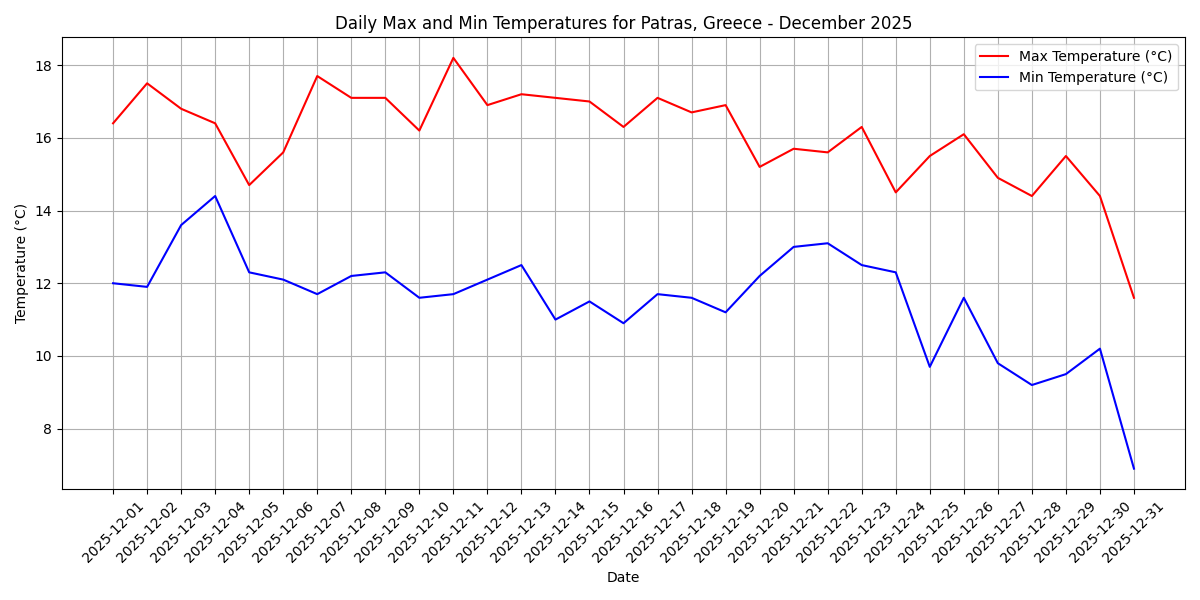

<Figure size 1200x600 with 1 Axes>
[Agent] Displaying generated image...


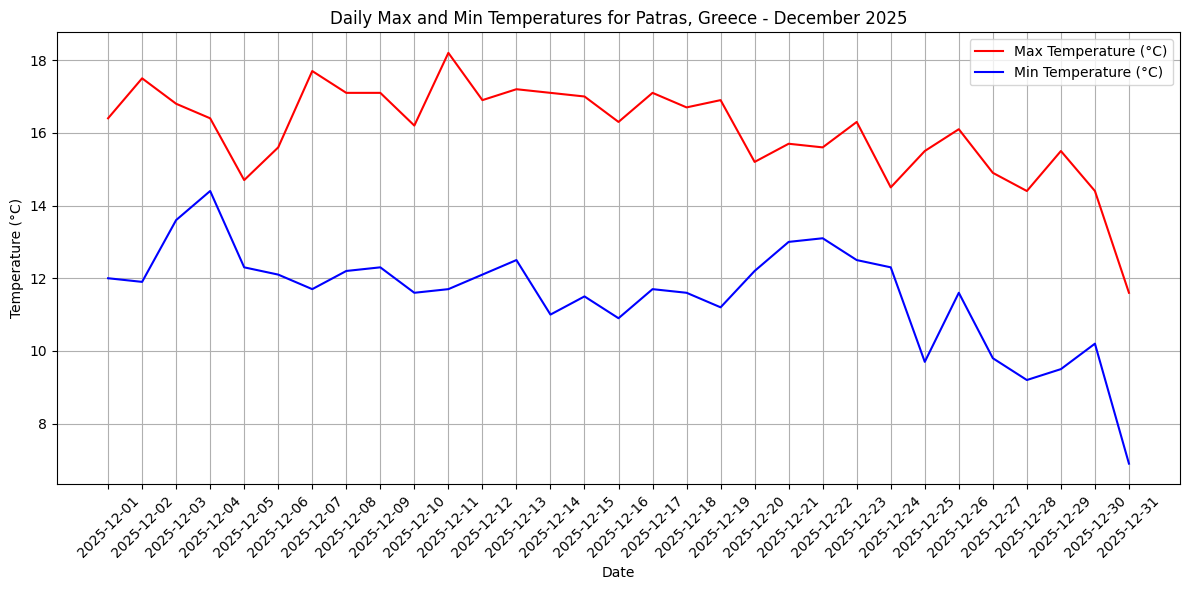

patras_dec_2025_temps_plot.png
[Tool result] "{\"results\": [{\"text\": \"<PIL.Image.Image image mode=RGBA size=1200x600>\"}, {\"text\": \"<Figure size 1200x600 with 1 Axes>\", \"chart\": {\"type\": \"line\", \"title\": \"Daily Max and Min Temperatures for Patras, Greece - December 2025\", \"elements\": [{\"label\": \"Max Temperature (\\u00b0C)\", \"points\": [[\"2025-12-01\", 16.4], [\"2025-12-02\", 17.5], [\"2025-12-03\", 16.8], [\"2025-12-04\", 16.4], [\"2025-12-05\", 14.7], [\"2025-12-06\", 15.6], [\"2025-12-07\", 17.7], [\"2025-12-08\", 17.1], [\"2025-12-09\", 17.1], [\"2025-12-10\", 16.2], [\"2025-12-11\", 18.2], [\"2025-12-12\", 16.9], [\"2025-12-13\", 17.2], [\"2025-12-14\", 17.1], [\"2025-12-15\", 17.0], [\"2025-12-16\", 16.3], [\"2025-12-17\", 17.1], [\"2025-12-18\", 16.7], [\"2025-12-19\", 16.9], [\"2025-12-20\", 15.2], [\"2025-12-21\", 15.7], [\"2025-12-22\", 15.6], [\"2025-12-23\", 16.3], [\"2025-12-24\", 14.5], [\"2025-12-25\", 15.5], [\"2025-12-26\", 16.1], [\"2025-12-27

[Agent] [ResponseOutputText(annotations=[], text='I fetched the daily max and min temperatures for Patras, Greece for December 2025 using the historical weather API from open-meteo. The data is saved in a CSV file named "patras_dec_2025_temps.csv". \n\nI also created a plot of these temperatures over the month, which shows the daily max and min temperatures clearly.\n\nIf you want me to provide the CSV file or the plot image file, please let me know.', type='output_text', logprobs=[])]
[Agent] No more function calls. Stopping.

[Result] Agent messages:


In [9]:
query = """Fetch the daily max/min temperatures of December 2025 for the city of Patras, Greece using 'https://open-meteo.com/en/docs/historical-weather-api'. Save the data as csv file. Then, read the data from the file and create a plot of them."""

with Sandbox.create(timeout=3600) as sbx:
    messages = coding_agent(
        client=client,
        sbx=sbx,
        query=query,
        system=system,
        tools=tools,
        tools_schemas=[execute_code_schema, write_file_schema, read_file_schema, list_files_schema],
        max_steps=10,
    )
    
    print("\n[Result] Agent messages:")
    for m in messages:
        if m.get("role") == "assistant":
            for block in m.get("content", []):
                text = block.get("text")
                if text.startswith("FINAL: "):
                    print(text[len("FINAL: "):])

---

# 🎉 Congratulations!

You've completed your coding agent project! You've learned how to:

✅ Define tool schemas and execution functions for LLM function calling  
✅ Implement an agent loop with conversation memory and iterative reasoning  
✅ Integrate E2B sandboxes for safe cloud code execution  
✅ Handle tool results and build multi-step autonomous agents  

## Next Steps

Want to extend your project? Try:
- Adding more tools (file operations, web scraping, API calls)
- Implementing conversation memory persistence across sessions
- Creating specialized agents for different domains (data science, web dev, DevOps)
- Building multi-agent systems where agents collaborate on complex tasks

---

> ⚠️ **Final Reminder:** Your workspace session lasts 2 hours. Download `project.ipynb` now to save your work!

---

**Resources:**
- [E2B Documentation](https://e2b.dev/docs)
- [OpenAI Function Calling Guide](https://platform.openai.com/docs/guides/function-calling)
- [E2B GitHub](https://github.com/e2b-dev/e2b)

---

## 📋 Optional Feedback Survey

We'd love to hear about your experience! Your feedback helps us create more valuable educational experiences.

**[Take the short survey →](https://rebrand.ly/e2b-course)**

This optional survey asks about:
- Project quality and engagement
- What you found most valuable
- How we can improve future projects

Thank you for your time! 🙏